# 8. The final analysis
** **
## Table of contents:

1. Importing libraries <br>
2. Importing the dataframe <br>
3. Security implications <br>
4. Spending habits between different regions <br>
5. Exclusion flag
    - 5.1 Exporting the new dataframe with exclusion flag
6. Customers profiling
    - 6.1 Segmentation by age
    - 6.2 Segmentation by family status and number of dependants
    - 6.3 Segmentation by income
    - 6.4 Segmentation by shopping behaviour
        - 6.4.1 Orders containing babies products
        - 6.4.2 Orders containing pets products
    - 6.5 Segmentation by shopping hours
7. Segmentation visualization
    - 7.1 Segmentation visualization by age
    - 7.2 Segmentation visualization by family status and number of dependants
    - 7.3 Segmentation visualization by income
    - 7.4 Segmentation visualization by shopping behaviour
        - 7.4.1 Orders containing babies products
        - 7.4.2 Orders containing pets products
    - 7.5 Segmentation visualization by shopping hours
8. Profiles aggregation for usage frequency and expenditure
    - 8.1 Aggregations for age categories
    - 8.2 Aggregations for household categories
    - 8.3 Aggregations for income categories
    - 8.4 Aggregations for shopping behaviour
        - 8.4.1 Orders containing babies products
        - 8.4.2 Orders containing pets products
    - 8.5 Aggregations for shopping hours
9. Profiles comparison with regions and departments
    - 9.1 Comparison with regions
        - 9.1.1 Income categories and regions
        - 9.1.2 Age categories and regions
        - 9.1.3 Shopping hours and regions
        - 9.1.4 Price label and regions
        - 9.1.5 Days of the week and regions
    - 9.2 Comparison with departments
        - 9.2.1 Departments frequency
        - 9.2.2 Income categories and departments
        - 9.2.3 Age categories and departments
        - 9.2.4 Household categories and departments
10. Additional analyses
    - 10.1 Price labels distribution
    - 10.2 Shopping hours habits by loyalty status
    - 10.3 Shopping hours habits by age categories
    - 10.4 Shopping hours habits by household categories
    - 10.5 Shopping hours habits by income categories
    - 10.6 Improving the days frequency bar chart
    - 10.7 Improving the hours frequency histogram
    - 10.8 Improving the prices frequency histogram
    - 10.9 Improving the loyalty bar chart
11. Exporting
    - 11.1 Exporting dataframe
    - 11.2 Exporting charts
** **

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing dataframe
** **

In [2]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 5\Instacart basket analysis'

In [3]:
# Importing the most up to date version of the dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_all_clean.pkl'))

In [4]:
# Removing the max columns limit
pd.set_option('display.max_columns', None)

In [5]:
# Checking the output
df_ords_prods_all

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy,Average orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest day,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


# 3. Security implications
** **

The customer dataset contains sensitive informations, in particular full name, state, and age. <br>
Such information should be handled with care and shouldn't be disclosed in public. <br>
The columns full_name and last_name in particular contains PII (personal identifiable information). <br>
Customers' name are not required for this project, so I will drop them.

In [6]:
# Deleting the two columns
df_ords_prods_all = df_ords_prods_all.drop(columns = ['first_name', 'last_name'])

In [7]:
# Checking the output
df_ords_prods_all

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy,Average orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest day,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


Columns successfully deleted.

# 4. Spending habits between different regions
** **

In this section we are going to compare the customer spending habit in different geographic areas. <br>
We are going to derive a new variable (region) from the "state" column.

In [8]:
# Creating a list through a for-loop
list_region = []

for value in df_ords_prods_all['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    list_region.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    list_region.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    list_region.append("South")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    list_region.append("West")
  else:
    list_region.append("No data")

In [9]:
# Creating a new column in the dataframe, containing the list created
df_ords_prods_all['region'] = list_region

In [10]:
# Checking the head
df_ords_prods_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
# Checking the frequency of the new column
df_ords_prods_all['region'].value_counts(dropna = False)

South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: region, dtype: int64

<b> Observations: </b> <br>
"South" is the most populated category.

In [12]:
# Crossing the region variable with the spending flag to check spending habits between regions
crosstab = pd.crosstab(df_ords_prods_all['spending_flag'], df_ords_prods_all['region'], dropna = False)

In [13]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,148734,102942,197639,150082
Low spender,6958852,5253330,9902178,7615006


<b> Observations: </b> <br>
According to the current data, there isn't a significative difference between regions. <br>
In all 4 regions, only a small percentage of customers are "High spender".

# 5. Exclusion flag
** **

In this section we are going to create an exclusion flag to exclude customers with less than 5 orders. <br>
For this purpose, we need to derive a new column from the max_order column.

In [14]:
# Creating a list through a for-loop
list_exclusion = []

for value in df_ords_prods_all['max_order']:
  if value < 5:
    list_exclusion.append("Low activity")
  elif value >= 5:
    list_exclusion.append("High activity")
  else:
    list_exclusion.append("To be checked")

In [15]:
# Creating a new column in the dataframe, containing the list created
df_ords_prods_all['activity_flag'] = list_exclusion

In [16]:
# Testing
df_ords_prods_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [17]:
# Checking the frequency of the new column
df_ords_prods_all['activity_flag'].value_counts(dropna = False)

High activity    29303281
Low activity      1025482
Name: activity_flag, dtype: int64

<b> Observations: </b> <br>
It seems the majority of Instacart customers are "High activity" users.

In [18]:
# Creating a subset that contains only "High activity" customers
df_ords_prods_all_exclusion = df_ords_prods_all[df_ords_prods_all['activity_flag'] == 'High activity']

In [19]:
# Checking the shape of the new dataframe
df_ords_prods_all_exclusion.shape

(29303281, 32)

<b> Observations: </b> <br>
The new dataframe (subset) that excludes "Low activity" users, has around 1 million rows less, compared to the previous dataframe.

## 5.1 Exporting the new dataframe with exclusion flag

In [20]:
# Exporting the new dataframe
df_ords_prods_all_exclusion.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'orders_products_all_clean_exclusion.pkl'))

# 6. Customers profiling
** **

In this section we will profile our customers following certain criteria.

## 6.1 Segmentation by age

In [21]:
# Checking the descriptive statistics of the age column
df_ords_prods_all_exclusion['age'].describe()

count    2.930328e+07
mean     4.946594e+01
std      1.848512e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<b> Observations: </b> <br>
The min value is 18, while the maximum is 81. <br>
According to multiple sources, age categories can be divided as the following: <br>
Young adults (18-39) <br>
Middle age (40-59) <br> 
Senior (60+)

In [22]:
# Creating a new variable containing the age category
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['age'] <= 39, 'age_category'] = 'Young adult'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\2115671636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['age'] <= 39, 'age_category'] = 'Young adult'


In [23]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['age'] >= 40) & (df_ords_prods_all_exclusion['age'] <= 59), 'age_category'] = 'Middle age'

In [24]:
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['age'] >= 60, 'age_category'] = 'Senior'

In [25]:
# Testing
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult


In [26]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['age_category'].value_counts(dropna = False)

Young adult    10095020
Senior         10005026
Middle age      9203235
Name: age_category, dtype: int64

<b> Observations: </b> <br>
Suprisingly, the categories are equally distributed.

## 6.2 Segmentation by family status and number of dependants

In [27]:
# Checking the descriptive statistics of the number of dependants column
df_ords_prods_all_exclusion['number_dependants'].describe()

count    2.930328e+07
mean     1.501900e+00
std      1.118969e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

<b> Observations: </b> <br>
The min value is 0 and the max value is 3.

In [28]:
# Checking the frequency of the familiar status column
df_ords_prods_all_exclusion['fam_status'].value_counts(dropna = False)

married                             20575742
single                               4820773
divorced/widowed                     2504114
living with parents and siblings     1402652
Name: fam_status, dtype: int64

In [29]:
# Creating a crosstab to see the combinations of the values
crosstab_family = pd.crosstab(df_ords_prods_all_exclusion['fam_status'], df_ords_prods_all_exclusion['number_dependants'], dropna = False)

In [30]:
# Checking the crosstab
crosstab_family

number_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2504114,0,0,0
living with parents and siblings,0,481447,458654,462551
married,0,6822179,6858671,6894892
single,4820773,0,0,0


<b> Observations: </b> <br>
It seems there are 0 married users with 0 number of dependants. <br>
This does mean that if the number of dependants is 1, the dependant is the partner, so the couple does not have any child. <br>
If major than 1, it means the couple does have children.

According to the familiar status and the number of dependants, we can segment the customers in the following categories:

If married and number of dependants is = 1: Married without children;
<br>
If married and number of dependants is > 1: Married with children;
<br>
If single OR divorced/widowed: one person;
<br>
If living with parents and sibling: other.

In [31]:
# Deriving the new column
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['fam_status'] == 'married') & (df_ords_prods_all_exclusion['number_dependants'] == 1), 'household_category'] = 'Married without children'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\3474834222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['fam_status'] == 'married') & (df_ords_prods_all_exclusion['number_dependants'] == 1), 'household_category'] = 'Married without children'


In [32]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['fam_status'] == 'married') & (df_ords_prods_all_exclusion['number_dependants'] > 1), 'household_category'] = 'Married with children'

In [33]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['fam_status'] == 'single') | (df_ords_prods_all_exclusion['fam_status'] == 'divorced/widowed'), 'household_category'] = 'One person'

In [34]:
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['fam_status'] == 'living with parents and siblings', 'household_category'] = 'Other'

In [35]:
# Checking the head
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category,household_category
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children


In [36]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['household_category'].value_counts(dropna = False)

Married with children       13753563
One person                   7324887
Married without children     6822179
Other                        1402652
Name: household_category, dtype: int64

<b> Observations: </b> <br>
Almost 50% of ours users are married with children. <br>
The other half is split almost equally between users married without children or one person household. <br>
Only a relatively small part of our users are living with parents or siblings.

## 6.3 Segmentation by income

In [37]:
# Checking the descriptive statistics of the income column
df_ords_prods_all_exclusion['income'].describe()

count    2.930328e+07
mean     9.972059e+04
std      4.317487e+04
min      2.590300e+04
25%      6.735100e+04
50%      9.678000e+04
75%      1.281150e+05
max      5.939010e+05
Name: income, dtype: float64

<b> Observations: </b> <br>
The minimum value is 25.903 USD and the max value is 593.901 USD. The mean is 99.720 USD (so, this is the average). <br>
Considering the quartile distribution ( 25% until around 70k, 50% until around 100k, 75% until around 130k), I will create the following categories: <br>
<br>
If income < 70.000 USD = Low; <br>
If income >= 70.000 USD and <= 100.000 USD = Average; <br>
If income >= 100.000 USD and <= 130.00 USD = Medium-High; <br>
If income >= 130.000 USD = High

In [38]:
# Deriving the new column
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['income'] < 70000, 'income_category'] = 'Low'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\4242935943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['income'] < 70000, 'income_category'] = 'Low'


In [39]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['income'] >= 70000) & (df_ords_prods_all_exclusion['income'] <= 100000), 'income_category'] = 'Average'

In [40]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['income'] >= 100000) & (df_ords_prods_all_exclusion['income'] <= 130000), 'income_category'] = 'Medium-High'

In [41]:
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['income'] >= 130000, 'income_category'] = 'High'

In [42]:
# Checking the head
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category,household_category,income_category
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low


In [43]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['income_category'].value_counts(dropna = False)

Low            8052164
Average        7799899
High           7007906
Medium-High    6443312
Name: income_category, dtype: int64

<b>Observations:</b> <br>
The income categories are not so differents between each other. <br>
However it will be very helpful to analyze further these categories, in relation to the kind of goods (department_id) bought by every category.

## 6.4 Segmentation by shopping behaviour

In this section we are going to segmentate users by their shopping behaviour, in relation to the products ordered. <br>
For this reason, we will need to map the department_id through our data dictionary.

In [44]:
# Importing the departments dataframe
df_data_dict = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'))

In [45]:
# Testing the output
df_data_dict

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
# Changing the name of the first column
df_data_dict.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [47]:
# Testing again
df_data_dict.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<b> Observations: </b> <br>
There are many departments and is difficult to profile and segmentate customers according to specific criteria. <br>
I think it would be a good idea to segmentate customers through the two following categories: <br>
<br>
Orders containing babies products (we can later cross check this category with the one created before: "Married with children"). <br>
Orders containing pets product.

### 6.4.1 Orders containing babies products

In [48]:
# Creating a new flag column based on the "babies" value in the department_id column
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] == '18', 'contains_babies_product'] = 'Yes'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\3846471798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] == '18', 'contains_babies_product'] = 'Yes'


In [49]:
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] != '18', 'contains_babies_product'] = 'No'

In [50]:
# Checking the head
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category,household_category,income_category,contains_babies_product
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No


In [51]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['contains_babies_product'].value_counts(dropna = False)

No     28911574
Yes      391707
Name: contains_babies_product, dtype: int64

<b> Observations: </b> <br>
Only a small percentage of orders contains babies products.

### 6.4.2 Orders containing pets products

In [52]:
# Creating a new flag column based on the "pet" value in the department_id column
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] == '8', 'contains_pets_product'] = 'Yes'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\3049994480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] == '8', 'contains_pets_product'] = 'Yes'


In [53]:
df_ords_prods_all_exclusion.loc[df_ords_prods_all_exclusion['department_id'] != '8', 'contains_pets_product'] = 'No'

In [54]:
# Checking the head
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category,household_category,income_category,contains_babies_product,contains_pets_product
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No


In [55]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['contains_pets_product'].value_counts(dropna = False)

No     29215476
Yes       87805
Name: contains_pets_product, dtype: int64

<b> Observations: </b> <br>
Only a small percentage of orders contains pets products.

## 6.5 Segmentation by shopping hours

In this section we are going to segmentate users by their shopping hours. <br>
Considering the distribution of hours in one day and the most busiest hours for orders, I will create the following categories: <br>
<br>
Order placed between 5 and 9: Morning person; <br>
Order placed between 10 and 23: Regular; <br>
Order placed between 0 and 4: Night person.

In [56]:
# Creating a new flag column based on the hours in the "order hour of creation" column
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['order_hour_of_creation'] >= 5) & (df_ords_prods_all_exclusion['order_hour_of_creation'] <= 9), 'shopping_hour_habit'] = 'Morning person'

C:\Users\Simone\AppData\Local\Temp\ipykernel_36968\3370917134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['order_hour_of_creation'] >= 5) & (df_ords_prods_all_exclusion['order_hour_of_creation'] <= 9), 'shopping_hour_habit'] = 'Morning person'


In [57]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['order_hour_of_creation'] >= 10) & (df_ords_prods_all_exclusion['order_hour_of_creation'] <= 23), 'shopping_hour_habit'] = 'Regular'

In [58]:
df_ords_prods_all_exclusion.loc[(df_ords_prods_all_exclusion['order_hour_of_creation'] >= 0) & (df_ords_prods_all_exclusion['order_hour_of_creation'] <= 4), 'shopping_hour_habit'] = 'Night person'

In [59]:
# Checking the head
df_ords_prods_all_exclusion.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,region,activity_flag,age_category,household_category,income_category,contains_babies_product,contains_pets_product,shopping_hour_habit
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No,Morning person
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No,Regular
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No,Morning person
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No,Regular
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,Married with children,Low,No,No,Morning person


In [60]:
# Checking the frequency of the new column
df_ords_prods_all_exclusion['shopping_hour_habit'].value_counts(dropna = False)

Regular           23849336
Morning person     4999808
Night person        454137
Name: shopping_hour_habit, dtype: int64

<b> Observations: </b> <br>
A huge part of orders are placed by customers during the daily regular hours. <br>
A consistent part of users enjoy placing orders early in the morning, while only a small percentage of user are night person.

# 7. Segmentation visualizations
** **

In this section we will visualize through charts the distribution of the profiles created.

## 7.1 Segmentation visualization by age

Text(0.5, 1.0, 'Segmentation by age categories')

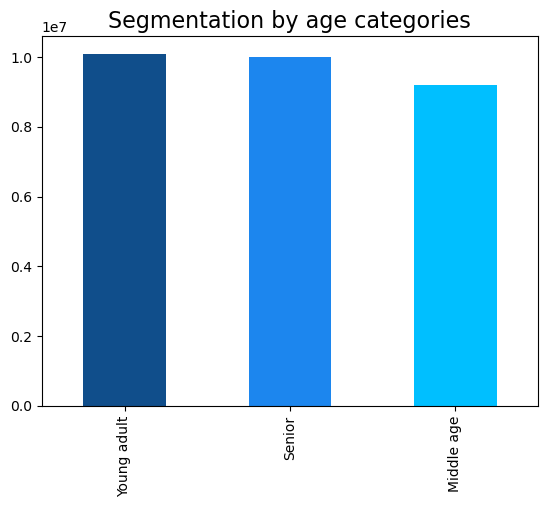

In [61]:
# Creating a bar chart for age categories
bar_age = df_ords_prods_all_exclusion['age_category'].value_counts().plot.bar(color = ['#104E8B', '#1C86EE', '#00BFFF'])
plt.title("Segmentation by age categories", fontsize = '16')

<b> Observations: </b> <br>
This chart shows that Instacart users are almost equally splitted into the three categories, with "young adult" being on the lead.

## 7.2 Segmentation visualization by family status and number of dependants

Text(0.5, 1.0, 'Segmentation by household categories')

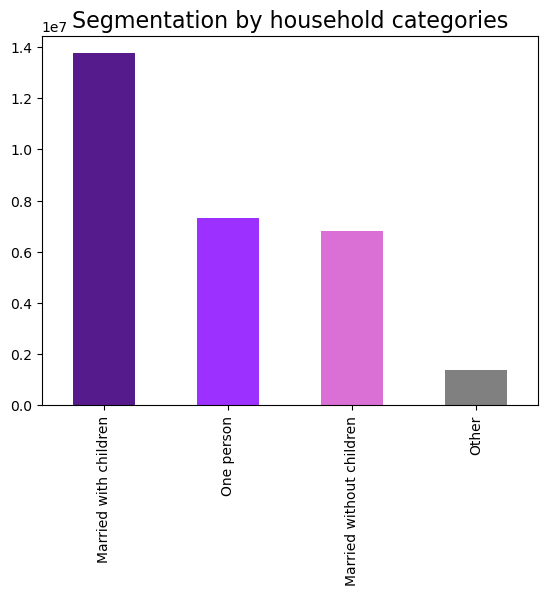

In [62]:
# Creating a bar chart for household categories
bar_household = df_ords_prods_all_exclusion['household_category'].value_counts().plot.bar(color = ['#551A8B', '#9B30FF', '#DA70D6', '#808080'])
plt.title("Segmentation by household categories", fontsize = '16')

<b> Observations: </b> <br>
The chart shows the predominance of users married with children. <br>
It can be a useful insight for the marketing team.

## 7.3 Segmentation visualization by income

Text(0.5, 1.0, 'Segmentation by income categories')

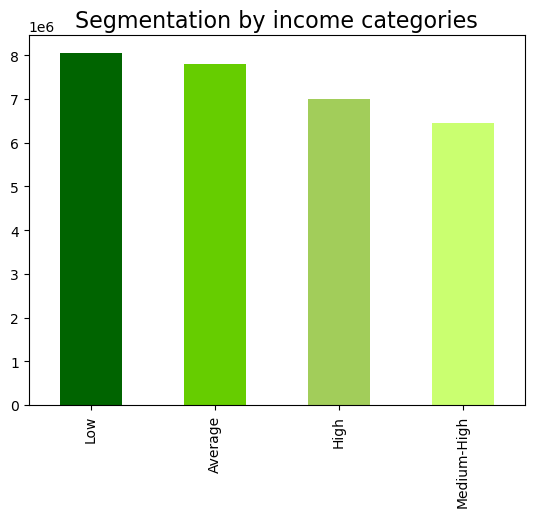

In [63]:
# Creating a bar chart for income categories
bar_income = df_ords_prods_all_exclusion['income_category'].value_counts().plot.bar(color = ['#006400', '#66CD00', '#A2CD5A', '#CAFF70'])
plt.title("Segmentation by income categories", fontsize = '16')

<b> Observations: </b> <br>
The chart shows some slightly difference between the categories. <br>
The highest percentage of customers have low and average income, but there is also a consister part of customers with high and medium-high income.

## 7.4 Segmentation visualization by shopping behaviour

### 7.4.1 Orders containing babies products

Text(0.5, 1.0, 'Percentage of babies products on total products')

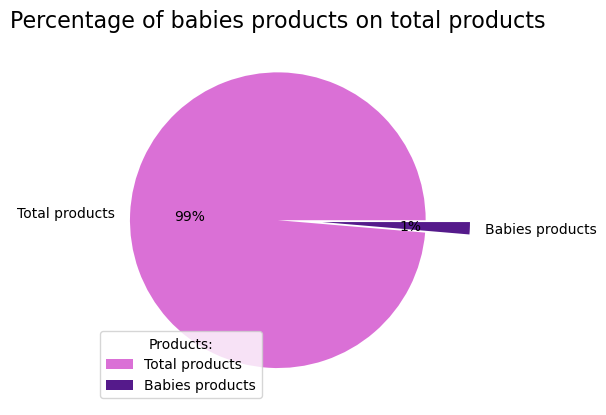

In [64]:
# Creating a pie chart showing the proportion between babies products ordered and total products ordered
pie_babies = df_ords_prods_all_exclusion['contains_babies_product'].value_counts().plot.pie(labels = ['Total products','Babies products'], autopct=('%1.f%%'), colors = ['#DA70D6', '#551A8B'], label = '', explode = [0,0.3])
pie_babies.legend(title = 'Products:', loc = 'lower left')
plt.title("Percentage of babies products on total products", fontsize = '16')

<b> Observations: </b> <br>
Despite half of the customers being "Married with children", only 1% of the items ordered are babies products.

### 7.4.2 Orders containing pets products

Text(0.5, 1.0, 'Percentage of pets products on total products')

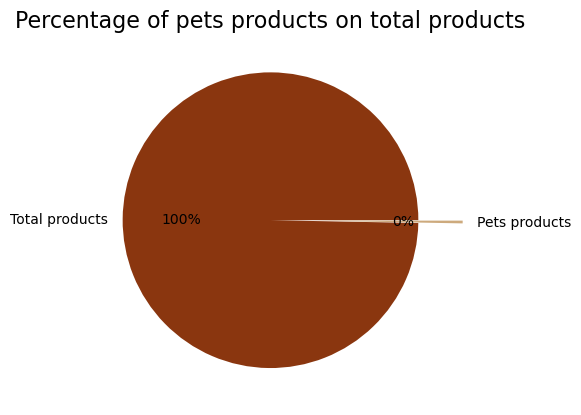

In [65]:
# Creating a pie chart showing the proportion between pet products ordered and total products ordered
pie_pets = df_ords_prods_all_exclusion['contains_pets_product'].value_counts().plot.pie(labels = ['Total products','Pets products'], autopct=('%1.f%%'), colors = ['#8A360F', '#CDAA7D'], label = '', explode = [0,0.3])
pie_babies.legend(title = 'Products:', loc = 'lower left')
plt.title("Percentage of pets products on total products", fontsize = '16')

<b> Observations: </b> <br>
The percentage is so negligible that is basically near 0%.
According to our data, is not possible to target (or profile) pet owners.

## 7.5 Segmentation visualization by shopping hours

Text(0.5, 1.0, 'Segmentation by shopping hours')

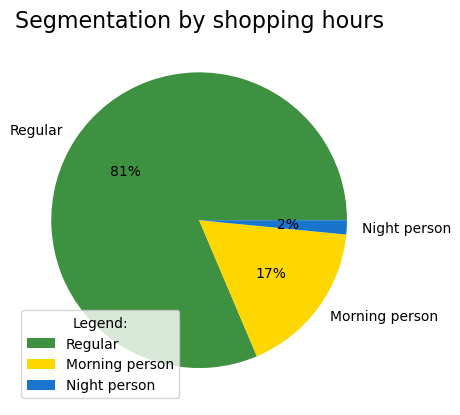

In [66]:
# Creating a pie chart for shopping hour categories
pie_shopping = df_ords_prods_all_exclusion['shopping_hour_habit'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['#3D9140', '#FFD700', '#1874CD'], label = '')
pie_shopping.legend(title = 'Legend:', loc = 'lower left')
plt.title("Segmentation by shopping hours", fontsize = '16')

<b> Observations: </b> <br>
More than 80% of our customers places an order between 10 and 23. <br>
Almost 20% places orders early in the morning and only a drastically small percentage places an order during the night hours.

# 8. Profiles aggregation for usage frequency and expenditure
** **

In this section, we will look at some descriptive measures (mean, max e min) for usage frequency and expenditure, in regard to the customer profiles created.

## 8.1 Aggregations for age categories

In [67]:
# Descriptive measure for age categories (usage frequency)
df_ords_prods_all_exclusion.groupby('age_category').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                min       mean   max
age_category                                        
Middle age                      0.0  10.819702  30.0
Senior                          0.0  10.800665  30.0
Young adult                     0.0  10.811278  30.0

In [68]:
# Descriptive measure for age categories (expenditure)
df_ords_prods_all_exclusion.groupby('age_category').agg({'prices': ['min', 'mean', 'max']})

prices                
                min      mean   max
age_category                       
Middle age      1.0  7.791715  25.0
Senior          1.0  7.796158  25.0
Young adult     1.0  7.785764  25.0

<b> Observations: </b> <br>
Measures are very similar to each other, no significative difference.

## 8.2 Aggregations for household categories

In [69]:
# Descriptive measure for household categories (usage frequency)
df_ords_prods_all_exclusion.groupby('household_category').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                            min       mean   max
household_category                                              
Married with children                       0.0  10.823959  30.0
Married without children                    0.0  10.814660  30.0
One person                                  0.0  10.791951  30.0
Other                                       0.0  10.750995  30.0

In [70]:
# Descriptive measure for household categories (expenditure)
df_ords_prods_all_exclusion.groupby('household_category').agg({'prices': ['min', 'mean', 'max']})

prices                
                            min      mean   max
household_category                             
Married with children       1.0  7.788246  25.0
Married without children    1.0  7.795305  25.0
One person                  1.0  7.790889  25.0
Other                       1.0  7.801433  25.0

<b> Observations: </b> <br>
Measures are very similar to each other, no significative difference.

## 8.3 Aggregations for income categories

In [71]:
# Descriptive measure for income categories (usage frequency)
df_ords_prods_all_exclusion.groupby('income_category').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                   min       mean   max
income_category                                        
Average                            0.0  10.751101  30.0
High                               0.0  10.746057  30.0
Low                                0.0  10.935594  30.0
Medium-High                        0.0  10.795257  30.0

In [72]:
# Descriptive measure for income categories (expenditure)
df_ords_prods_all_exclusion.groupby('income_category').agg({'prices': ['min', 'mean', 'max']})

prices                
                   min      mean   max
income_category                       
Average            1.0  7.956823  25.0
High               1.0  7.949965  25.0
Low                1.0  7.359842  25.0
Medium-High        1.0  7.957125  25.0

<b> Observations: </b> <br>
Measures are very similar to each other. <br>
There is just something noteworthy about the "Low income" category. <br>
The mean for the "days since prior order" is slightly higher (meaning these user order slightly less frequently comparerd to the other categories). <br>
Also the mean for "prices" is slightly lower, meaning they spend less compared to the other categories.

## 8.4 Aggregations for shopping behaviour

### 8.4.1 Orders containing babies products

In [73]:
# Descriptive measure for babies products (usage frequency)
df_ords_prods_all_exclusion.groupby('contains_babies_product').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                           min       mean   max
contains_babies_product                                        
No                                         0.0  10.824248  30.0
Yes                                        0.0   9.780844  30.0

In [74]:
# Descriptive measure for babies products (expenditure)
df_ords_prods_all_exclusion.groupby('contains_babies_product').agg({'prices': ['min', 'mean', 'max']})

prices                
                           min      mean   max
contains_babies_product                       
No                         1.0  7.793353  25.0
Yes                        1.0  7.630969  15.0

<b> Observations: </b> <br>
Here there is something interesting. The max value for the orders containing babies products is 15 USD. <br>
This could mean that either there aren't products costing more than 15$ or that customers ordering babies products are trying to spend less money.

In [75]:
# Creating a crosstab to compare the department_id (18) with prices
crosstab_babies_agg = pd.crosstab(df_ords_prods_all_exclusion['department_id'], df_ords_prods_all_exclusion['prices'], dropna = False)

In [76]:
crosstab_babies_agg

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,14.0,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,17.0,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,18.0,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,19.0,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,20.0,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9,21.0,21.1,21.3,21.4,21.5,21.6,21.7,21.8,21.9,22.0,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.8,22.9,23.0,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0
department_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4737,14198,18301,26138,7180,15258,28505,20139,42763,9346,10426,6242,7222,33530,12349,6789,5907,9044,5662,19795,5775,12921,12541,26924,9568,16631,9486,8349,9362,9067,8989,27943,6929,20970,18759,14470,6169,23157,27469,15922,14407,10693,8285,28300,11182,6515,6203,11541,20637,14521,8307,21399,20532,14641,21104,16543,13188,11390,13260,11296,18259,9842,9575,9721,35863,10223,7749,12679,9564,16129,17712,29284,7844,49417,22040,9372,15035,5702,11744,17148,15843,8176,4546,6365,23485,11226,31891,6662,19622,7071,15746,11105,4163,13927,5754,6431,81781,22103,5332,5784,17665,2015,12324,5009,12448,21749,7557,16709,6519,6700,13924,11351,5193,8369,8571,24419,17026,16897,12326,15873,6275,7841,27199,3443,7244,11941,12891,9814,15571,4423,10164,19567,8536,33441,6591,18394,2269,4872,8230,12043,12260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,104,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,188,0,0,0,0,769,3841,0,141,835,0,319,1160,0,374,0,9483,0,0,0,0,0,21,0,0,0,0,654,0,0,0,0,753,0,0,35,0,0,114,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,0,47,0,0,1201,0,464,0,0,59,5906,0,0,15,0,0,0,0,0,1230,281,85,0,0,0,2432,507,0,0,0,22,0,350,0,0,0,0,462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,789,2227,1675,1432,3842,1966,3520,1964,2056,1895,3229,3169,3968,3988,4646,1646,3037,3880,2879,4266,3452,1346,1976,2812,2398,2063,7002,2116,2429,2211,1972,2208,1404,2472,2173,2996,2052,4321,8970,1729,2247,2942,1579,5877,2431,2021,3719,3900,1938,1603,3368,2166,3025,3390,6019,2648,3647,4950,3799,2578,2274,1191,3122,1858,2984,2727,2801,1659,2764,2840,1664,1309,2109,3973,1890,4817,2337,3172,3444,3162,1644,2068,6390,1329,3712,1754,2709,2915,2201,3037,2232,1621,3347,1304,1432,2606,4327,2291,2528,2097,2569,1823,3419,3831,2747,2816,1549,3309,1482,2155,1215,4367,3935,1359,4615,4075,4331,2159,3539,2479,2245,2717,3802,2284,3997,4887,2855,1558,3862,1599,2254,2230,3172,2943,5529,2185,2619,2918,2196,4030,419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263,47047,4589,307,416,16,7440,9654,2987,24566,538,1

This is interesting. The only products costing more than 15 USD are the meat seafood (department_id: 12). <br>
This explains why the max value for babies products is 15 USD.

### 8.4.2 Orders containing pets products

In [77]:
# Descriptive measure for pets products (usage frequency)
df_ords_prods_all_exclusion.groupby('contains_pets_product').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                         min       mean   max
contains_pets_product                                        
No                                       0.0  10.807946  30.0
Yes                                      0.0  11.593531  30.0

In [78]:
# Descriptive measure for pets products (expenditure)
df_ords_prods_all_exclusion.groupby('contains_pets_product').agg({'prices': ['min', 'mean', 'max']})

prices                
                         min      mean   max
contains_pets_product                       
No                       1.0  7.790899  25.0
Yes                      1.0  7.885155  15.0

<b> Observations: </b> <br>
Measures are very similar to each other, no significative difference.
Here, the max value is 15 USD as well, as explained above.

## 8.5 Aggregations for shopping hours

In [79]:
# Descriptive measure for shopping hours categories (usage frequency)
df_ords_prods_all_exclusion.groupby('shopping_hour_habit').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                       min       mean   max
shopping_hour_habit                                        
Morning person                         0.0  10.393468  30.0
Night person                           0.0  11.908486  30.0
Regular                                0.0  10.876774  30.0

In [80]:
# Descriptive measure for shopping hours categories (expenditure)
df_ords_prods_all_exclusion.groupby('shopping_hour_habit').agg({'prices': ['min', 'mean', 'max']})

prices                
                       min      mean   max
shopping_hour_habit                       
Morning person         1.0  7.781419  25.0
Night person           1.0  7.817654  25.0
Regular                1.0  7.792724  25.0

<b> Observations: </b> <br>
Measures are very similar to each other, no significative difference.

# 9. Profiles comparison with regions and departments
** **

In this section we perform additional analyses on customer profiles, in relation to regions and departments.

## 9.1 Comparison with regions

### 9.1.1 Income categories and regions

In [81]:
# Creating a crosstab between income categories and regions
crosstab_income_region = pd.crosstab(df_ords_prods_all_exclusion['region'], df_ords_prods_all_exclusion['income_category'], dropna = False)

In [82]:
# Checking the output
crosstab_income_region

income_category,Average,High,Low,Medium-High
region,,,,
Midwest,1785392,1669704,1864015,1549308
Northeast,1384526,1238504,1405586,1144245
South,2650141,2312671,2693521,2100540
West,1979840,1787027,2089042,1649219


This is a little difficult to analyze in a tabular format. <br>
Let's see how does it look in a bar chart.

Text(0.5, 0, 'Region')

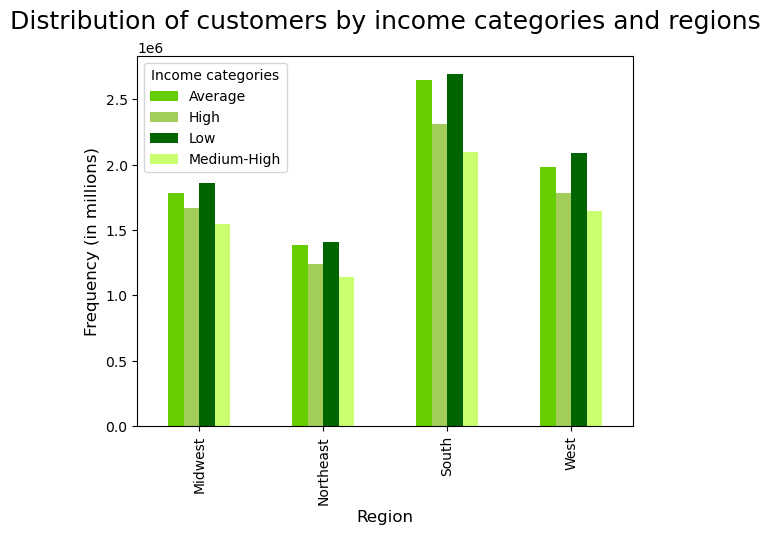

In [83]:
# Creating a bar chart of income categories clustered by regions
bar_income_region = crosstab_income_region.plot(kind = 'bar', color = ['#66CD00', '#A2CD5A', '#006400', '#CAFF70'])
bar_income_region.legend(title = 'Income categories')
plt.title('Distribution of customers by income categories and regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

<b> Observations: </b> <br>
Looking at this chart, is easy to see how the region with the highest frequency is the South region. <br>
Additionally, in every region the categories "Low income" and "Average income" are the ones with the highest frequency.

### 9.1.2 Age categories and regions

In [84]:
# Creating a crosstab between age categories and regions
crosstab_age_region = pd.crosstab(df_ords_prods_all_exclusion['region'], df_ords_prods_all_exclusion['age_category'], dropna = False)

In [85]:
# Checking the output
crosstab_age_region

age_category,Middle age,Senior,Young adult
region,,,
Midwest,2198605,2320742,2349072
Northeast,1617061,1783733,1772067
South,3008773,3331706,3416394
West,2378796,2568845,2557487


Let's have a look at it through a bar chart.

Text(0.5, 0, 'Region')

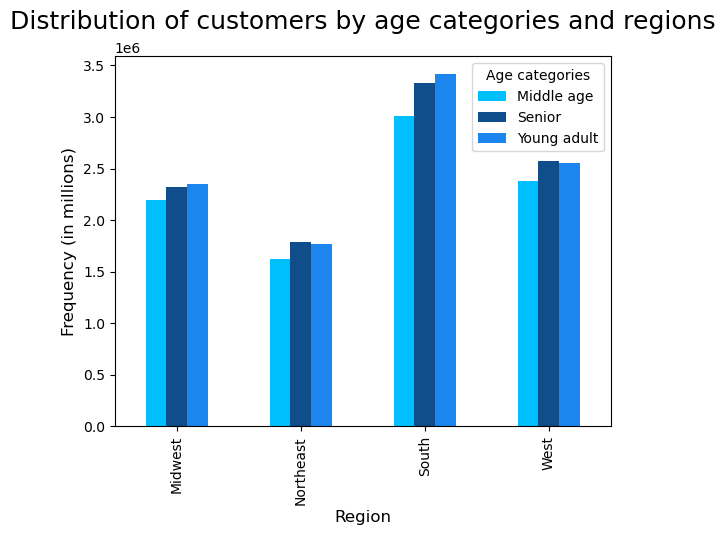

In [86]:
# Creating a bar chart of age categories clustered by regions
bar_age_region = crosstab_age_region.plot(kind = 'bar', color = ['#00BFFF', '#104E8B', '#1C86EE'])
bar_age_region.legend(title = 'Age categories')
plt.title('Distribution of customers by age categories and regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

<b> Observations: </b> <br>
This is interesting. <br>
In Northeast and West, "Senior" is the most populated category, with "Young adult" coming in second. <br>
In South and Midwest the positions are inverted, with "Young adult" on the lead. <br>
Middle Age is the least populated category in every region.

### 9.1.3 Shopping hours and regions

In [87]:
# Creating a crosstab between shopping hours and regions
crosstab_hours_region = pd.crosstab(df_ords_prods_all_exclusion['region'], df_ords_prods_all_exclusion['shopping_hour_habit'], dropna = False)

In [88]:
# Checking the output
crosstab_hours_region

shopping_hour_habit,Morning person,Night person,Regular
region,,,
Midwest,1163990,106778,5597651
Northeast,882345,81172,4209344
South,1680641,150676,7925556
West,1272832,115511,6116785


Text(0.5, 0, 'Region')

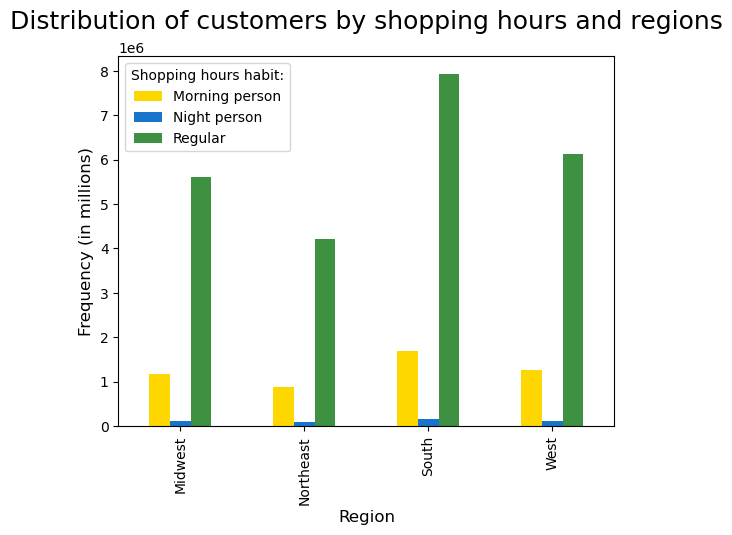

In [89]:
# Creating a bar chart of shopping hours clustered by regions
bar_hours_region = crosstab_hours_region.plot(kind = 'bar', color = ['#FFD700', '#1874CD', '#3D9140'])
bar_hours_region.legend(title = 'Shopping hours habit:')
plt.title('Distribution of customers by shopping hours and regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

<b> Observations: </b> <br>
In all regions, there is a huge predominance of orders placed by customers during the regular hours, with a small percentage of orders in the early morning and an even smaller percentage of orders placed during the night.

### 9.1.4 Price label and regions

In [90]:
# Creating a crosstab between products price range and regions
crosstab_label_region = pd.crosstab(df_ords_prods_all_exclusion['region'], df_ords_prods_all_exclusion['price_label'], dropna = False)

In [91]:
# Checking the output
crosstab_label_region

price_label,High-range product,Low-range product,Mid-range product
region,,,
Midwest,87962,2144620,4635837
Northeast,65887,1621053,3485921
South,125314,3043832,6587727
West,96670,2345813,5062645


Text(0.5, 0, 'Region')

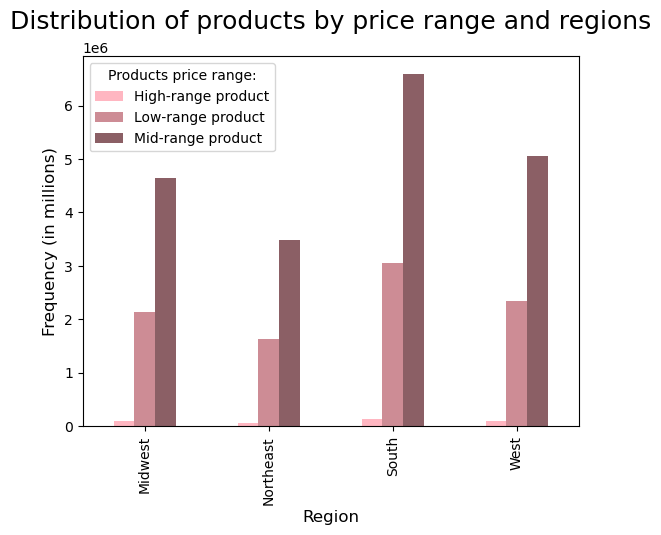

In [92]:
# Creating a bar chart of products price range clustered by regions
bar_label_region = crosstab_label_region.plot(kind = 'bar', color = ['#FFB6C1', '#CD8C95', '#8B5F65'])
bar_label_region.legend(title = 'Products price range:')
plt.title('Distribution of products by price range and regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

<b> Observations: </b> <br>
In all regions, the products most bought are "Mid-range" price, followed by "Low-range" price products. <br>
Only a small percentage of products ordered are "High-range" price products.

### 9.1.5 Days of the week and regions

In [93]:
# Creating a crosstab between orders placed during different days and regions
crosstab_day_region = pd.crosstab(df_ords_prods_all_exclusion['region'], df_ords_prods_all_exclusion['orders_day_of_week'], dropna = False)

In [94]:
# Checking the output
crosstab_day_region

orders_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1309743,1195866,898489,810411,807683,894833,951394
Northeast,983660,905534,675087,615775,605320,680757,706728
South,1841610,1712321,1269676,1164894,1144985,1274868,1348519
West,1433286,1311879,970812,887594,883703,979559,1038295


Text(0.5, 0, 'Region')

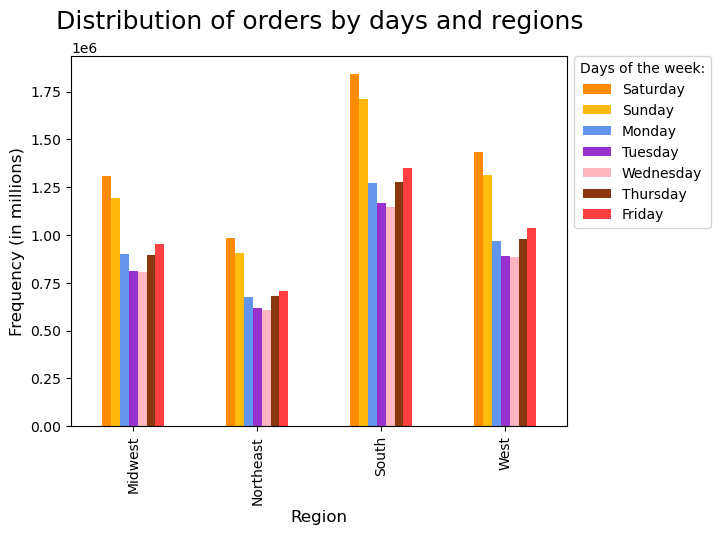

In [95]:
# Creating a bar chart of orders placed during different days, clustered by regions
bar_day_region = crosstab_day_region.plot(kind = 'bar', color = ['#FF8C00', '#FFB90F', '#6495ED', '#9932CC', '#FFB6C1', '#8A360F', '#FF4040'])
bar_day_region.legend(title = 'Days of the week:', bbox_to_anchor=(1, 1.02), loc='upper left', labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Distribution of orders by days and regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

<b> Observations: </b> <br>
In all regions, customers prefer to place orders during the weekend, in particular on Saturday and Sunday.

## 9.2 Comparison with departments

### 9.2.1 Departments frequency

Text(0.5, 0, 'Departments')

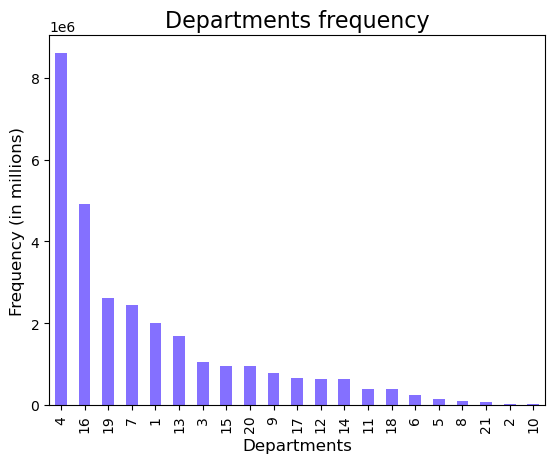

In [96]:
# Creating a bar chart for departments frequency
bar_departments = df_ords_prods_all_exclusion['department_id'].value_counts().plot.bar(color = ['#8470FF'])
plt.title("Departments frequency", fontsize = '16')
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)

This won't help us, because shows the departments ID but not the department name. <br>
I will fix this in a new chart, renaming the x ticks.

In [97]:
# Checking the data dictionary
df_data_dict

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


[Text(0, 0, 'Produce'),
 Text(1, 0, 'Dairy eggs'),
 Text(2, 0, 'Snacks'),
 Text(3, 0, 'Beverages'),
 Text(4, 0, 'Frozen'),
 Text(5, 0, 'Pantry'),
 Text(6, 0, 'Bakery'),
 Text(7, 0, 'Canned goods'),
 Text(8, 0, 'Deli'),
 Text(9, 0, 'Dry goods pasta'),
 Text(10, 0, 'Household'),
 Text(11, 0, 'Meat seafood'),
 Text(12, 0, 'Breakfast'),
 Text(13, 0, 'Personal care'),
 Text(14, 0, 'Babies'),
 Text(15, 0, 'International'),
 Text(16, 0, 'Alcohol'),
 Text(17, 0, 'Pets'),
 Text(18, 0, 'Missing'),
 Text(19, 0, 'Other'),
 Text(20, 0, 'Bulk')]

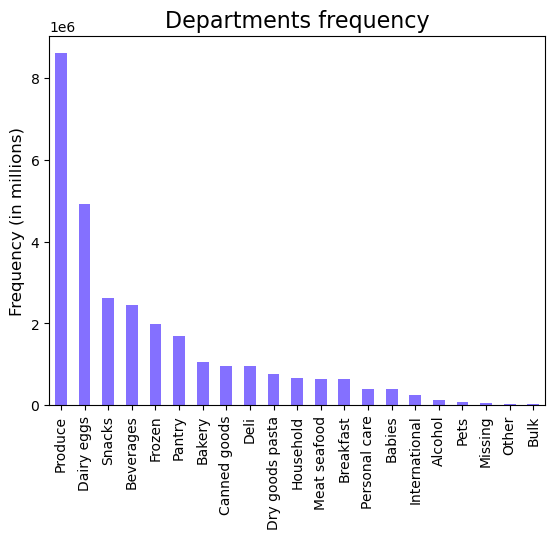

In [98]:
# Creating the new chart
bar_departments_name = df_ords_prods_all_exclusion['department_id'].value_counts().plot.bar(color = ['#8470FF'])
plt.title("Departments frequency", fontsize = '16')
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=90, fontsize = 10)
bar_departments_name.set_xticklabels(["Produce", "Dairy eggs", "Snacks", "Beverages", "Frozen", "Pantry", "Bakery", "Canned goods", "Deli", "Dry goods pasta", "Household", "Meat seafood", "Breakfast", "Personal care", "Babies", "International", "Alcohol", "Pets", "Missing", "Other", "Bulk"]) 

Definitely better! <br>
<br>
<b> Observations: </b> <br>
"Produce" and "Dairy eggs" are the departments with the highest frequency in the dataframe. <br>
Honorable mentions also for "Snacks", "Beverages", "Frozen" and "Pantry". <br>
In general, food is what our customers seems buy the most.

### 9.2.2 Income categories and departments

In [99]:
# Creating a crosstab between income categories and departments
crosstab_income_departments = pd.crosstab(df_ords_prods_all_exclusion['department_id'], df_ords_prods_all_exclusion['income_category'], dropna = False)

In [100]:
# Checking the output
crosstab_income_departments

income_category,Average,High,Low,Medium-High
department_id,,,,
1,535824,487652,529455,443513
10,8580,7033,9794,6591
11,106123,96146,111410,86060
12,183175,165057,137006,152038
13,453062,412843,435525,379961
14,159638,147151,192826,133854
15,262534,239741,233947,218227
16,1335611,1193426,1291663,1088653
17,168675,160448,188979,140873


[Text(0, 0, 'Frozen'),
 Text(1, 0, 'Bulk'),
 Text(2, 0, 'Personal care'),
 Text(3, 0, 'Meat seafood'),
 Text(4, 0, 'Pantry'),
 Text(5, 0, 'Breakfast'),
 Text(6, 0, 'Canned goods'),
 Text(7, 0, 'Dairy eggs'),
 Text(8, 0, 'Household'),
 Text(9, 0, 'Babies'),
 Text(10, 0, 'Snacks'),
 Text(11, 0, 'other'),
 Text(12, 0, 'Deli'),
 Text(13, 0, 'Missing'),
 Text(14, 0, 'Bakery'),
 Text(15, 0, 'Produce'),
 Text(16, 0, 'Alcohol'),
 Text(17, 0, 'International'),
 Text(18, 0, 'Beverages'),
 Text(19, 0, 'Pets'),
 Text(20, 0, 'Dry goods pasta')]

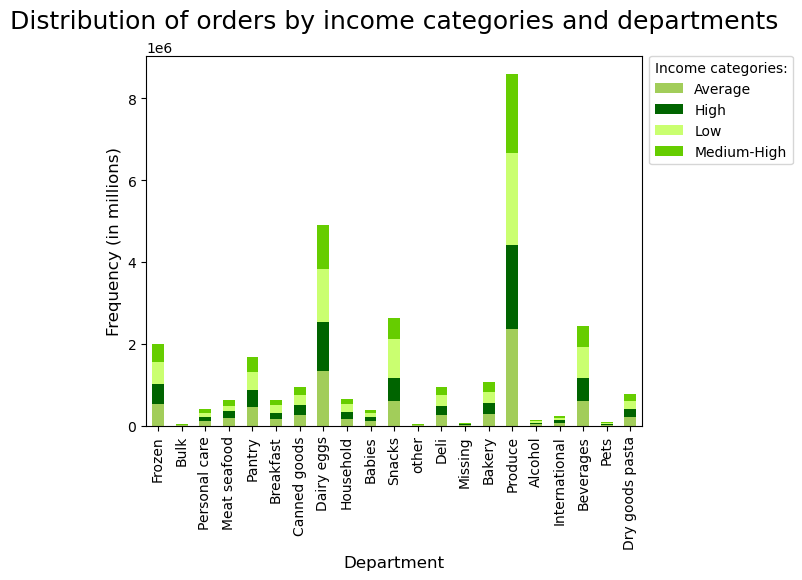

In [101]:
# Creating a stacked bar chart
bar_income_departments = crosstab_income_departments.plot(kind = 'bar', stacked = True, color = ['#A2CD5A', '#006400', '#CAFF70', '#66CD00'])
bar_income_departments.legend(title = 'Income categories:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of orders by income categories and departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)
bar_income_departments.set_xticklabels(["Frozen", "Bulk", "Personal care", "Meat seafood", "Pantry", "Breakfast", "Canned goods", "Dairy eggs", "Household", "Babies", "Snacks", "other", "Deli", "Missing", "Bakery", "Produce", "Alcohol", "International", "Beverages", "Pets", "Dry goods pasta"])

<b> Observations: </b> <br>
It seems income categories does not bear significative differences according to the chart. <br>
Maybe the only exception is the "snacks" department with a predominance of "Low income" customers.

### 9.2.3 Age categories and departments

In [102]:
# Creating a crosstab between age categories and departments
crosstab_age_departments = pd.crosstab(df_ords_prods_all_exclusion['department_id'], df_ords_prods_all_exclusion['age_category'], dropna = False)

In [103]:
# Checking the output
crosstab_age_departments

age_category,Middle age,Senior,Young adult
department_id,,,
1,626748,686010,683686
10,9981,10944,11073
11,127909,135321,136509
12,199716,219779,217781
13,528859,575080,577452
14,199429,214854,219186
15,299987,324470,329992
16,1537522,1670500,1701331
17,207081,226540,225354


[Text(0, 0, 'Frozen'),
 Text(1, 0, 'Bulk'),
 Text(2, 0, 'Personal care'),
 Text(3, 0, 'Meat seafood'),
 Text(4, 0, 'Pantry'),
 Text(5, 0, 'Breakfast'),
 Text(6, 0, 'Canned goods'),
 Text(7, 0, 'Dairy eggs'),
 Text(8, 0, 'Household'),
 Text(9, 0, 'Babies'),
 Text(10, 0, 'Snacks'),
 Text(11, 0, 'other'),
 Text(12, 0, 'Deli'),
 Text(13, 0, 'Missing'),
 Text(14, 0, 'Bakery'),
 Text(15, 0, 'Produce'),
 Text(16, 0, 'Alcohol'),
 Text(17, 0, 'International'),
 Text(18, 0, 'Beverages'),
 Text(19, 0, 'Pets'),
 Text(20, 0, 'Dry goods pasta')]

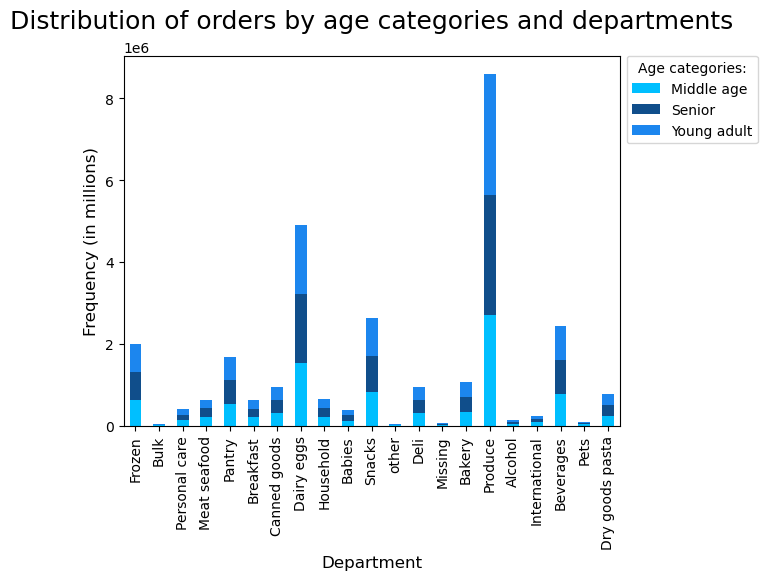

In [104]:
# Creating a stacked bar chart
bar_age_departments = crosstab_age_departments.plot(kind = 'bar', stacked = True, color = ['#00BFFF', '#104E8B', '#1C86EE'])
bar_age_departments.legend(title = 'Age categories:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of orders by age categories and departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)
bar_age_departments.set_xticklabels(["Frozen", "Bulk", "Personal care", "Meat seafood", "Pantry", "Breakfast", "Canned goods", "Dairy eggs", "Household", "Babies", "Snacks", "other", "Deli", "Missing", "Bakery", "Produce", "Alcohol", "International", "Beverages", "Pets", "Dry goods pasta"])

<b> Observations: </b> <br>
Taking a look at the chart, it seems that there is no significative correlation between a specific age category and departments.

### 9.2.4 Household categories and departments

In [105]:
# Creating a crosstab between household categories and departments
crosstab_household_departments = pd.crosstab(df_ords_prods_all_exclusion['department_id'], df_ords_prods_all_exclusion['household_category'], dropna = False)

In [106]:
# Checking the output
crosstab_household_departments

household_category,Married with children,Married without children,One person,Other
department_id,,,,
1,940205,461393,497944,96902
10,15030,7782,7635,1551
11,187436,93221,100047,19035
12,300760,149415,156524,30577
13,788618,393050,418653,81070
14,295737,149167,157152,31413
15,449099,222713,236880,45757
16,2296314,1148177,1227375,237487
17,311119,154923,161446,31487


[Text(0, 0, 'Frozen'),
 Text(1, 0, 'Bulk'),
 Text(2, 0, 'Personal care'),
 Text(3, 0, 'Meat seafood'),
 Text(4, 0, 'Pantry'),
 Text(5, 0, 'Breakfast'),
 Text(6, 0, 'Canned goods'),
 Text(7, 0, 'Dairy eggs'),
 Text(8, 0, 'Household'),
 Text(9, 0, 'Babies'),
 Text(10, 0, 'Snacks'),
 Text(11, 0, 'other'),
 Text(12, 0, 'Deli'),
 Text(13, 0, 'Missing'),
 Text(14, 0, 'Bakery'),
 Text(15, 0, 'Produce'),
 Text(16, 0, 'Alcohol'),
 Text(17, 0, 'International'),
 Text(18, 0, 'Beverages'),
 Text(19, 0, 'Pets'),
 Text(20, 0, 'Dry goods pasta')]

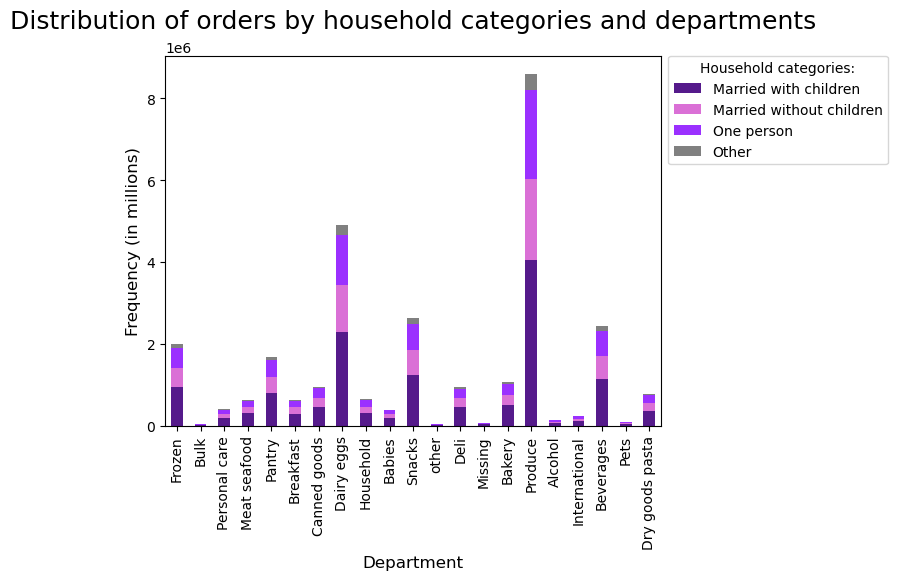

In [107]:
# Creating a stacked bar chart
bar_household_departments = crosstab_household_departments.plot(kind = 'bar', stacked = True, color = ['#551A8B', '#DA70D6', '#9B30FF', '#808080'])
bar_household_departments.legend(title = 'Household categories:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of orders by household categories and departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)
bar_household_departments.set_xticklabels(["Frozen", "Bulk", "Personal care", "Meat seafood", "Pantry", "Breakfast", "Canned goods", "Dairy eggs", "Household", "Babies", "Snacks", "other", "Deli", "Missing", "Bakery", "Produce", "Alcohol", "International", "Beverages", "Pets", "Dry goods pasta"])

<b> Observations: </b> <br>
It seems that "Married with children" is the most populated category in every department. <br>
There isn't a single department that is not following this general pattern. <br>
Funny is that even the categories "Married without children" and "One person" placed orders containing "Babies" products.

# 10. Additional analyses

In this section I will conduct additional analyses to answer some key questions and improve old charts.

## 10.1 Price labels distribution

Text(0.5, 1.0, 'Distribution of price labels')

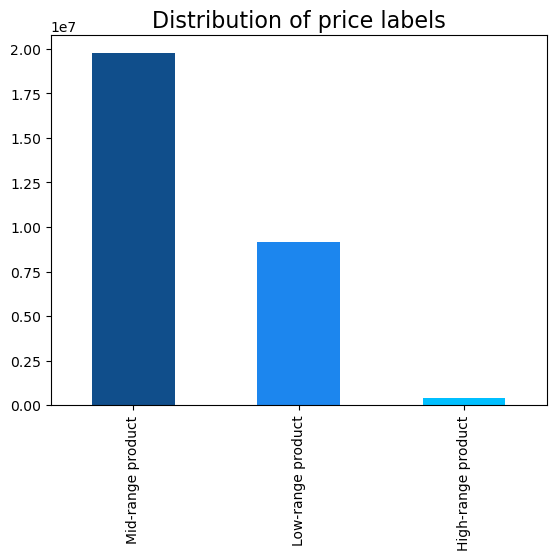

In [108]:
# Creating a price labels bar chart
bar_labels = df_ords_prods_all_exclusion['price_label'].value_counts().plot.bar(color = ['#104E8B', '#1C86EE', '#00BFFF'])
plt.title("Distribution of price labels", fontsize = '16')

<b> Observations: </b> <br>
Most of products sold are "Mid-range" in terms of price. <br>
Noteworthy is the category "Low-Range" as well, while the distribution of "High-range" products sold is low.

## 10.2 Shopping hours habits by loyalty status

In [109]:
# Creating a crosstab between shopping hours and loyalty flag
crosstab_hours_loyalty = pd.crosstab(df_ords_prods_all_exclusion['loyalty_flag'], df_ords_prods_all_exclusion['shopping_hour_habit'], dropna = False)

In [110]:
# Checking the output
crosstab_hours_loyalty

shopping_hour_habit,Morning person,Night person,Regular
loyalty_flag,,,
Loyal customer,1978429,137104,7979848
New customer,577898,73988,3474323
Regular customer,2443481,243045,12395165


Text(0.5, 0, 'Loyalty status')

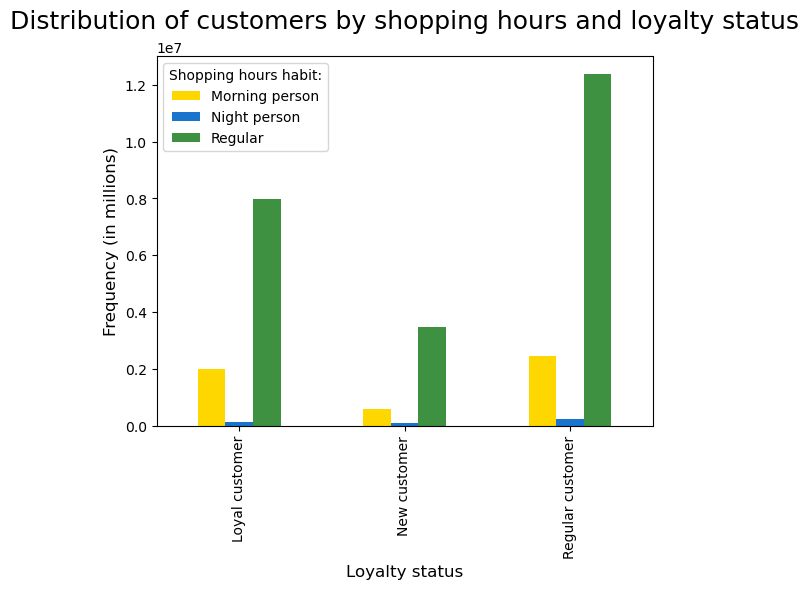

In [111]:
# Creating a bar chart of shopping hours clustered by loyalty status
bar_hours_loyalty = crosstab_hours_loyalty.plot(kind = 'bar', color = ['#FFD700', '#1874CD', '#3D9140'])
bar_hours_loyalty.legend(title = 'Shopping hours habit:')
plt.title('Distribution of customers by shopping hours and loyalty status', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Loyalty status',  fontsize = 12)

<b> Observations: </b> <br>
For all the loyalty status categories, customers prefer to place orders during "Regular" day hours. <br>
According to the data, I can't see a significative difference between the categories.

## 10.3 Shopping hours habits by age categories

In [112]:
# Creating a crosstab between shopping hours and age categories
crosstab_hours_age = pd.crosstab(df_ords_prods_all_exclusion['age_category'], df_ords_prods_all_exclusion['shopping_hour_habit'], dropna = False)

In [113]:
# Checking the output
crosstab_hours_age

shopping_hour_habit,Morning person,Night person,Regular
age_category,,,
Middle age,1570215,140854,7492166
Senior,1710756,152772,8141498
Young adult,1718837,160511,8215672


Text(0.5, 0, 'Age category')

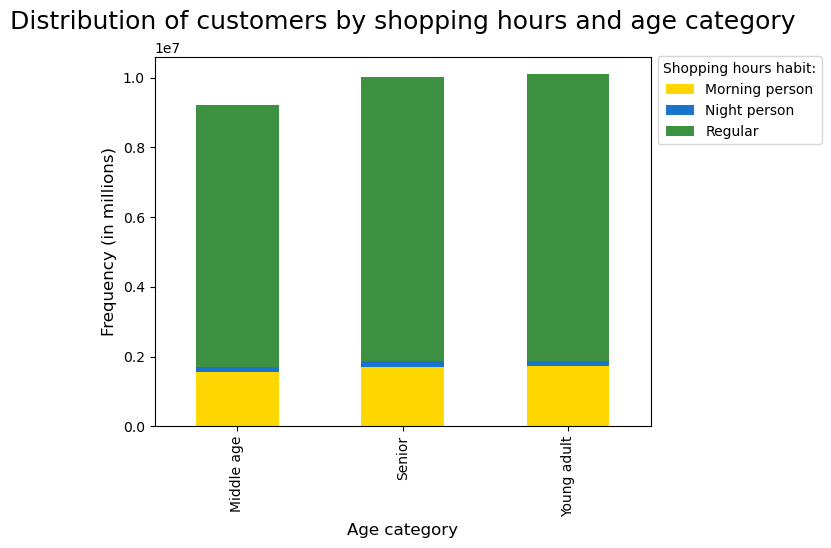

In [114]:
# Creating a stacked bar chart of shopping hours clustered by age category
bar_hours_age = crosstab_hours_age.plot(kind = 'bar', stacked = True, color = ['#FFD700', '#1874CD', '#3D9140'])
bar_hours_age.legend(title = 'Shopping hours habit:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of customers by shopping hours and age category', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age category',  fontsize = 12)

## 10.4 Shopping hours habits by household categories

In [115]:
# Creating a crosstab between shopping hours and household categories
crosstab_hours_household = pd.crosstab(df_ords_prods_all_exclusion['household_category'], df_ords_prods_all_exclusion['shopping_hour_habit'], dropna = False)

In [116]:
# Checking the output
crosstab_hours_household

shopping_hour_habit,Morning person,Night person,Regular
household_category,,,
Married with children,2339934,213038,11200591
Married without children,1168381,105623,5548175
One person,1255450,112057,5957380
Other,236043,23419,1143190


Text(0.5, 0, 'Household category')

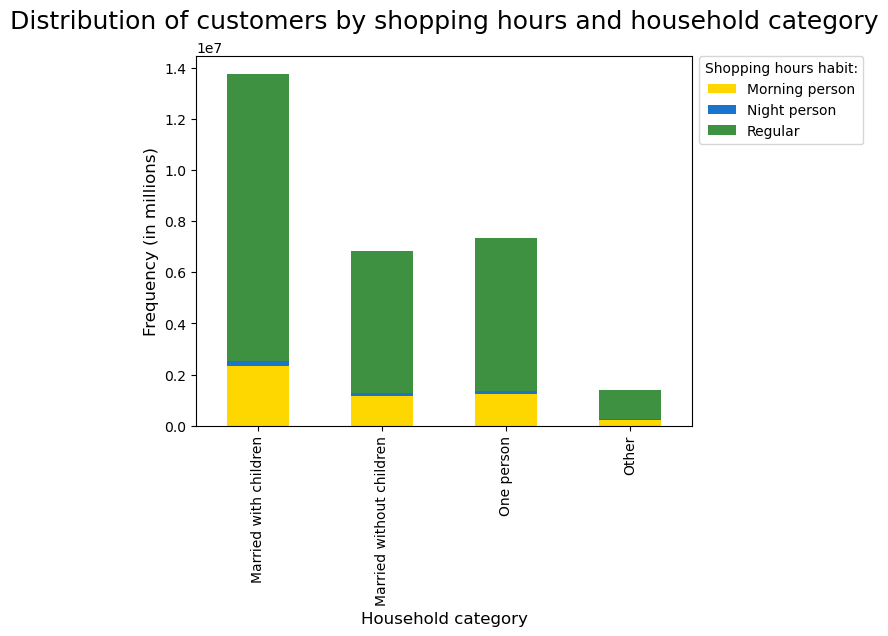

In [117]:
# Creating a stacked bar chart of shopping hours clustered by household category
bar_hours_household = crosstab_hours_household.plot(kind = 'bar', stacked = True, color = ['#FFD700', '#1874CD', '#3D9140'])
bar_hours_household.legend(title = 'Shopping hours habit:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of customers by shopping hours and household category', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household category',  fontsize = 12)

## 10.5 Shopping hours habits by income categories

In [118]:
# Creating a crosstab between shopping hours and income categories
crosstab_hours_income = pd.crosstab(df_ords_prods_all_exclusion['income_category'], df_ords_prods_all_exclusion['shopping_hour_habit'], dropna = False)

In [119]:
# Checking the output
crosstab_hours_income

shopping_hour_habit,Morning person,Night person,Regular
income_category,,,
Average,1307618,124884,6367397
High,1187583,106424,5713899
Low,1406371,123923,6521870
Medium-High,1098236,98906,5246170


Text(0.5, 0, 'Income category')

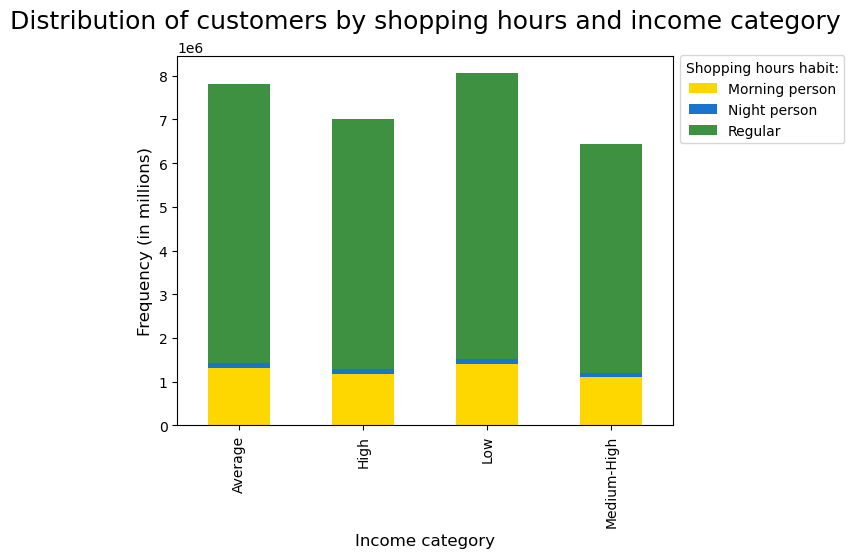

In [120]:
# Creating a stacked bar chart of shopping hours clustered by income category
bar_hours_income = crosstab_hours_income.plot(kind = 'bar', stacked = True, color = ['#FFD700', '#1874CD', '#3D9140'])
bar_hours_income.legend(title = 'Shopping hours habit:', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of customers by shopping hours and income category', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income category',  fontsize = 12)

## 10.6 Improving the days frequency bar chart

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Friday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Monday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

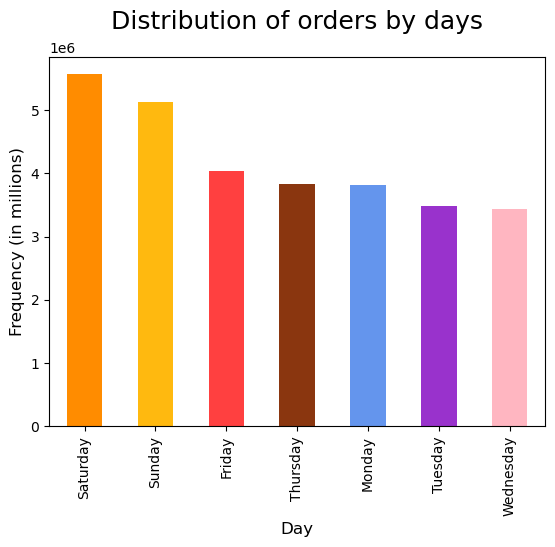

In [121]:
bar_orders_dow_new = df_ords_prods_all_exclusion['orders_day_of_week'].value_counts().plot.bar(color = ['#FF8C00', '#FFB90F', '#FF4040', '#8A360F', '#6495ED', '#9932CC', '#FFB6C1'])
plt.title('Distribution of orders by days', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day',  fontsize = 12)
bar_orders_dow_new.set_xticklabels(["Saturday", "Sunday", "Friday", "Thursday", "Monday", "Tuesday", "Wednesday"])

## 10.6 Improving the hours frequency histogram

Text(0.5, 0, 'Hour')

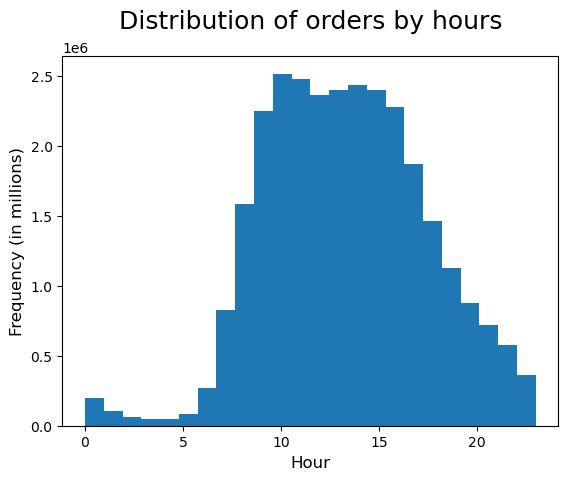

In [122]:
# Creating an histogram of order_hour_of_creation column
hist_hours_new = df_ords_prods_all_exclusion['order_hour_of_creation'].plot.hist(bins = 24)
plt.title('Distribution of orders by hours', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Hour',  fontsize = 12)

## 10.7 Improving the prices frequency histogram

Text(0.5, 0, 'Price')

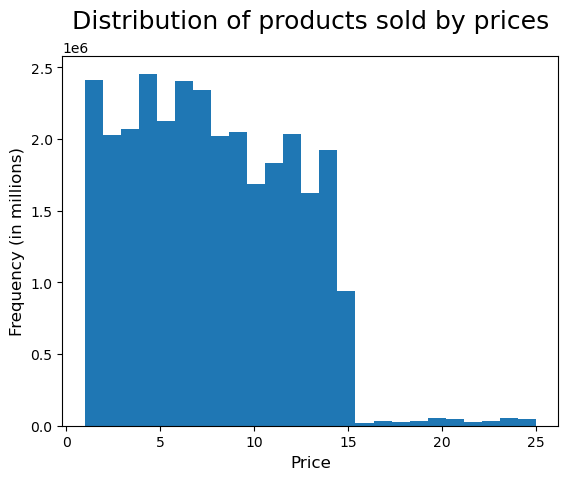

In [123]:
# Creating an histogram of order_hour_of_creation column
hist_prices_new = df_ords_prods_all['prices'].plot.hist(bins = 25)
plt.title('Distribution of products sold by prices', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price',  fontsize = 12)

## 10.8 Improving the loyalty bar chart

Text(0.5, 0, 'Status')

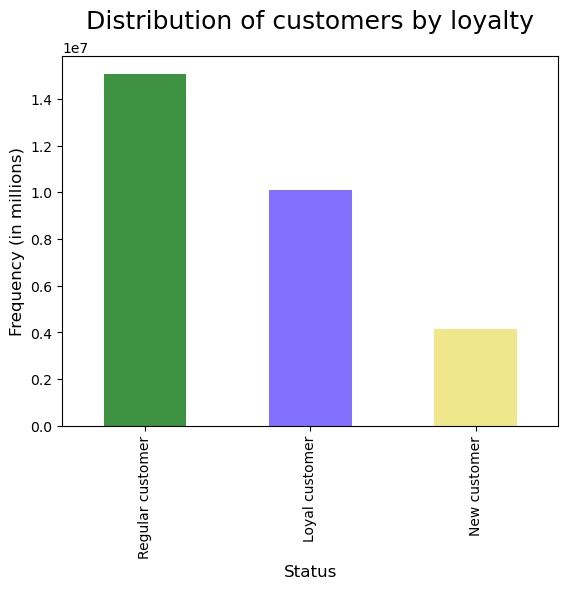

In [124]:
bar_loyalty_new = df_ords_prods_all_exclusion['loyalty_flag'].value_counts().plot.bar(color = ['#3D9140', '#8470FF', '#F0E68C'])
plt.title('Distribution of customers by loyalty', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Status',  fontsize = 12)

# 11. Exporting

## 11.1 Exporting dataframe

In [125]:
# Exporting the final dataframe (with all the new columns created for profiling customers) as a pickle file
df_ords_prods_all_exclusion.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'orders_products_all_clean_profiles.pkl'))

## 11.2 Exporting charts

In [126]:
# Exporting all the charts (24) from first to last
bar_age.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age.png'), bbox_inches = 'tight')

In [127]:
bar_household.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_household.png'), bbox_inches = 'tight')

In [128]:
bar_income.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income.png'), bbox_inches = 'tight')

In [129]:
pie_babies.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_babies.png'), bbox_inches = 'tight')

In [130]:
pie_pets.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_pets.png'), bbox_inches = 'tight')

In [131]:
pie_shopping.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_shopping.png'), bbox_inches = 'tight')

In [132]:
bar_income_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_region.png'), bbox_inches = 'tight')

In [133]:
bar_age_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_region.png'), bbox_inches = 'tight')

In [134]:
bar_hours_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hours_region.png'), bbox_inches = 'tight')

In [135]:
bar_label_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_label_region.png'), bbox_inches = 'tight')

In [136]:
bar_day_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_day_region.png'), bbox_inches = 'tight')

In [137]:
bar_departments_name.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_departments_name.png'), bbox_inches = 'tight')

In [138]:
bar_income_departments.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_departments.png'), bbox_inches = 'tight')

In [139]:
bar_age_departments.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_departments.png'), bbox_inches = 'tight')

In [140]:
bar_household_departments.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_household_departments.png'), bbox_inches = 'tight')

In [141]:
bar_labels.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_labels.png'), bbox_inches = 'tight')

In [142]:
bar_hours_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hours_loyalty.png'), bbox_inches = 'tight')

In [143]:
bar_hours_age.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hours_age.png'), bbox_inches = 'tight')

In [144]:
bar_hours_household.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hours_household.png'), bbox_inches = 'tight')

In [145]:
bar_hours_income.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hours_income.png'), bbox_inches = 'tight')

In [146]:
bar_orders_dow_new.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_orders_dow_new.png'), bbox_inches = 'tight')

In [147]:
hist_hours_new.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_hours_new.png'), bbox_inches = 'tight')

In [148]:
hist_prices_new.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_prices_new.png'), bbox_inches = 'tight')

In [149]:
bar_loyalty_new.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_new.png'), bbox_inches = 'tight')